In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
from torchvision import transforms
import cv2
from PIL import Image
import random
import json

In [39]:
img_dir = "/home/elimen/Data/OCR_dataset/Table/TableBank/Detection/images"
ann_path = "/home/elimen/Data/OCR_dataset/Table/TableBank/Detection/annotations/tablebank_word_train.json"

In [3]:
with open(ann_path, 'r') as ann_f:
    ann_dict = json.load(ann_f)

In [5]:
anno_dict = ann_dict['annotations']
img_dict = ann_dict['images']

In [9]:
anno_dict[:3]

[{'category_id': 1,
  'area': 46172,
  'iscrowd': 0,
  'segmentation': [[89, 316, 89, 435, 477, 435, 477, 316]],
  'id': 1,
  'image_id': 1,
  'bbox': [89, 316, 388, 119]},
 {'category_id': 1,
  'area': 27393,
  'iscrowd': 0,
  'segmentation': [[89, 423, 89, 492, 486, 492, 486, 423]],
  'id': 2,
  'image_id': 2,
  'bbox': [89, 423, 397, 69]},
 {'category_id': 1,
  'area': 45600,
  'iscrowd': 0,
  'segmentation': [[84, 87, 84, 201, 484, 201, 484, 87]],
  'id': 3,
  'image_id': 3,
  'bbox': [84, 87, 400, 114]}]

In [8]:
img_dict[:3]

[{'file_name': 'Anexa5.2_19.jpg',
  'width': 596,
  'id': 19960,
  'height': 842,
  'license': 1},
 {'file_name': '156208939_31.jpg',
  'width': 612,
  'id': 4768,
  'height': 792,
  'license': 1},
 {'file_name': 'pone.0038031.s001_1.jpg',
  'width': 612,
  'id': 67519,
  'height': 792,
  'license': 1}]

In [10]:
imgid2annoidx = {}
for i in range(len(anno_dict)):
    if str(anno_dict[i]['image_id']) in imgid2annoidx.keys():
        imgid2annoidx[str(anno_dict[i]['image_id'])].append(i)
    else:
        imgid2annoidx[str(anno_dict[i]['image_id'])] = [i]

In [12]:
imgid2annoidx  ## key:value -- 'image_id':'anno_index'

{'1': [0],
 '2': [1],
 '3': [2],
 '4': [3],
 '6': [4],
 '7': [5],
 '8': [6],
 '9': [7],
 '10': [8],
 '11': [9],
 '12': [10],
 '13': [11],
 '14': [12],
 '15': [13, 14],
 '16': [15],
 '17': [16, 17],
 '18': [18],
 '19': [19],
 '20': [20],
 '21': [21],
 '22': [22],
 '23': [23],
 '24': [24],
 '25': [25],
 '26': [26],
 '28': [27],
 '29': [28],
 '30': [29],
 '31': [30],
 '32': [31],
 '33': [32],
 '34': [33],
 '35': [34],
 '36': [35, 36],
 '37': [37],
 '38': [38, 39],
 '39': [40],
 '40': [41],
 '41': [42],
 '42': [43],
 '43': [44],
 '44': [45],
 '45': [46, 47],
 '46': [48, 49],
 '47': [50],
 '48': [51, 52],
 '49': [53, 54],
 '50': [55],
 '51': [56],
 '52': [57],
 '53': [58, 59],
 '54': [60],
 '55': [61, 62, 63],
 '56': [64, 65, 66],
 '57': [67, 68],
 '58': [69],
 '59': [70],
 '60': [71],
 '61': [72],
 '62': [73],
 '63': [74],
 '64': [75],
 '65': [76],
 '66': [77, 78],
 '67': [79],
 '68': [80],
 '69': [81],
 '70': [82, 83, 84],
 '71': [85],
 '72': [86],
 '73': [87, 88],
 '74': [89, 90],
 '75':

In [113]:
boxCountMax = 0 
for k, v in imgid2annoidx.items():
    if boxCountMax < len(v): idx = k
    boxCountMax = max(boxCountMax, len(v))
    
print(idx)
boxCountMax

63843


12

In [114]:
imgid2annoidx['63843']

[77477,
 77478,
 77479,
 77480,
 77481,
 77482,
 77483,
 77484,
 77485,
 77486,
 77487,
 77488]

In [89]:
sum = 0
for k, v in imgid2annoidx.items():
    sum += len(v)

sum == len(anno_dict)

True

In [85]:
imgIdx2imgId = {}
for i in range(len(img_dict)):
    imgIdx2imgId[i] = img_dict[i]['id']
imgIdx2imgId ## {idx:id}

{0: 19960,
 1: 4768,
 2: 67519,
 3: 3934,
 4: 36727,
 5: 61294,
 6: 73189,
 7: 21054,
 8: 65063,
 9: 53174,
 10: 50161,
 11: 51544,
 12: 68911,
 13: 65770,
 14: 77421,
 15: 55541,
 16: 43993,
 17: 68942,
 18: 3568,
 19: 56488,
 20: 4872,
 21: 51929,
 22: 13854,
 23: 64549,
 24: 32163,
 25: 61315,
 26: 5896,
 27: 4774,
 28: 11367,
 29: 22889,
 30: 42468,
 31: 56310,
 32: 44178,
 33: 17727,
 34: 33544,
 35: 5098,
 36: 25004,
 37: 12886,
 38: 468,
 39: 78397,
 40: 28411,
 41: 62874,
 42: 29516,
 43: 35616,
 44: 67292,
 45: 72759,
 46: 65797,
 47: 21365,
 48: 72093,
 49: 71377,
 50: 3229,
 51: 13843,
 52: 497,
 53: 52202,
 54: 32938,
 55: 42170,
 56: 12126,
 57: 21435,
 58: 7057,
 59: 17700,
 60: 67392,
 61: 61307,
 62: 71630,
 63: 17560,
 64: 62540,
 65: 3737,
 66: 52357,
 67: 28002,
 68: 22942,
 69: 33879,
 70: 45334,
 71: 68217,
 72: 13084,
 73: 61464,
 74: 23445,
 75: 55721,
 76: 21500,
 77: 68453,
 78: 33934,
 79: 34520,
 80: 63762,
 81: 48646,
 82: 50969,
 83: 27602,
 84: 2845,
 85: 

In [87]:
imgId2imgIdx = {}
for k,v in imgIdx2imgId.items():
    imgId2imgIdx[v] = k
    
imgId2imgIdx ## {id:idx}

{19960: 0,
 4768: 1,
 67519: 2,
 3934: 3,
 36727: 4,
 61294: 5,
 73189: 6,
 21054: 7,
 65063: 8,
 53174: 9,
 50161: 10,
 51544: 11,
 68911: 12,
 65770: 13,
 77421: 14,
 55541: 15,
 43993: 16,
 68942: 17,
 3568: 18,
 56488: 19,
 4872: 20,
 51929: 21,
 13854: 22,
 64549: 23,
 32163: 24,
 61315: 25,
 5896: 26,
 4774: 27,
 11367: 28,
 22889: 29,
 42468: 30,
 56310: 31,
 44178: 32,
 17727: 33,
 33544: 34,
 5098: 35,
 25004: 36,
 12886: 37,
 468: 38,
 78397: 39,
 28411: 40,
 62874: 41,
 29516: 42,
 35616: 43,
 67292: 44,
 72759: 45,
 65797: 46,
 21365: 47,
 72093: 48,
 71377: 49,
 3229: 50,
 13843: 51,
 497: 52,
 52202: 53,
 32938: 54,
 42170: 55,
 12126: 56,
 21435: 57,
 7057: 58,
 17700: 59,
 67392: 60,
 61307: 61,
 71630: 62,
 17560: 63,
 62540: 64,
 3737: 65,
 52357: 66,
 28002: 67,
 22942: 68,
 33879: 69,
 45334: 70,
 68217: 71,
 13084: 72,
 61464: 73,
 23445: 74,
 55721: 75,
 21500: 76,
 68453: 77,
 33934: 78,
 34520: 79,
 63762: 80,
 48646: 81,
 50969: 82,
 27602: 83,
 2845: 84,
 5472

In [115]:
imgId2imgIdx[63843]

9859

In [129]:
index = 9859
img_file = img_dict[index]['file_name']
img_id = img_dict[index]['id']
anno_index_list = imgid2annoidx[str(img_id)]
print(img_dict[index])  # image dict index :15
print(anno_index_list)
boxes = []
for i in range(len(anno_index_list)):
    boxes.append(anno_dict[anno_index_list[i]]['bbox']) 

boxes

{'file_name': 'New-Year-5-talk-booklet_5.jpg', 'width': 596, 'id': 63843, 'height': 842, 'license': 1}
[77477, 77478, 77479, 77480, 77481, 77482, 77483, 77484, 77485, 77486, 77487, 77488]


[[41, 73, 320, 86],
 [41, 197, 320, 95],
 [41, 330, 320, 91],
 [41, 450, 320, 68],
 [41, 548, 320, 152],
 [41, 734, 320, 67],
 [380, 73, 146, 85],
 [380, 197, 146, 94],
 [380, 330, 146, 90],
 [380, 450, 146, 67],
 [380, 548, 146, 151],
 [380, 734, 146, 67]]

In [130]:
boxes = np.array(boxes, dtype = np.float32)
boxes

array([[ 41.,  73., 320.,  86.],
       [ 41., 197., 320.,  95.],
       [ 41., 330., 320.,  91.],
       [ 41., 450., 320.,  68.],
       [ 41., 548., 320., 152.],
       [ 41., 734., 320.,  67.],
       [380.,  73., 146.,  85.],
       [380., 197., 146.,  94.],
       [380., 330., 146.,  90.],
       [380., 450., 146.,  67.],
       [380., 548., 146., 151.],
       [380., 734., 146.,  67.]], dtype=float32)

In [131]:
boxes[...,2:] = boxes[...,2:]+boxes[...,:2]
boxes

array([[ 41.,  73., 361., 159.],
       [ 41., 197., 361., 292.],
       [ 41., 330., 361., 421.],
       [ 41., 450., 361., 518.],
       [ 41., 548., 361., 700.],
       [ 41., 734., 361., 801.],
       [380.,  73., 526., 158.],
       [380., 197., 526., 291.],
       [380., 330., 526., 420.],
       [380., 450., 526., 517.],
       [380., 548., 526., 699.],
       [380., 734., 526., 801.]], dtype=float32)

In [117]:
import os
img_path = os.path.join(img_dir,img_file)
print(img_path)

/home/elimen/Data/OCR_dataset/Table/TableBank/Detection/images/New-Year-5-talk-booklet_5.jpg


In [118]:
img_id2index[73189]

74669

In [119]:
def draw_rectangle(img, boxes):
    for i in range(len(boxes)):
        x1,y1 = boxes[i][:2]
        x2 = boxes[i][2] +x1
        y2 = boxes[i][3] +y1
        print(x1,y1,x2,y2)
        cv2.rectangle(img, (x1,y1),(x2,y2),(0,255,0),2)

41 73 361 159
41 197 361 292
41 330 361 421
41 450 361 518
41 548 361 700
41 734 361 801
380 73 526 158
380 197 526 291
380 330 526 420
380 450 526 517
380 548 526 699
380 734 526 801


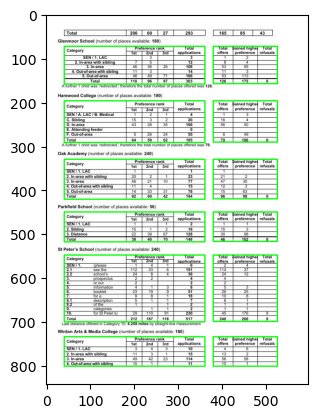

In [120]:
import matplotlib.pyplot as plt

img = cv2.imread(img_path)
draw_rectangle(img, boxes)
plt.imshow(img)
plt.show()

In [28]:
len(ann_dict['images'])

73383

In [37]:
category2id = {'table':1}

In [38]:
category2id

{'table': 1}

In [39]:
id2category = {'1':"table"}
id2category

{'1': 'table'}